In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1


### 1.1. 
Скачать следующие данные: kc-house-data и laptop_price 

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding='windows-1251', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
import calendar
df['date'] = pd.to_datetime(df['date'])
df['year_sale'] = df['date'].apply(lambda x: x.date().year)
df['month_sale'] = df['date'].apply(lambda x: x.date().month)
d = dict(enumerate(calendar.month_abbr))
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2


### 1.2. 
Изучите стоимости недвижимости
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

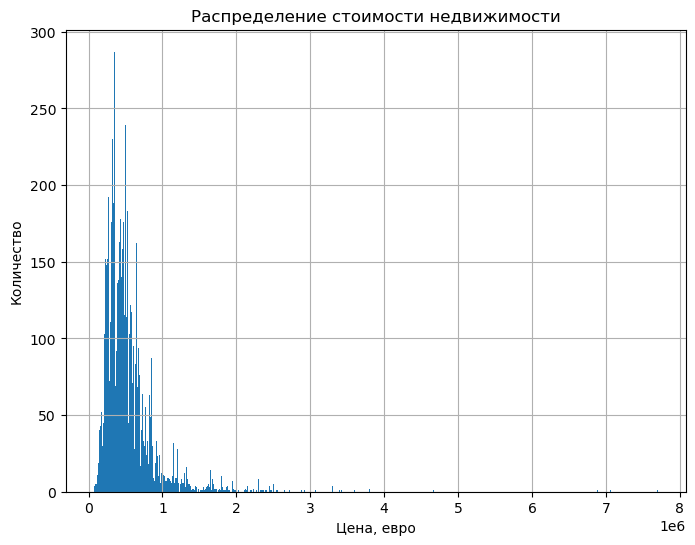

In [4]:
plt.figure(figsize=(8, 6))

plt.hist(df["price"], bins=2000)

plt.title("Распределение стоимости недвижимости")
plt.xlabel("Цена, евро")
plt.ylabel("Количество")
plt.grid();

#### Вывод:
- Максимальное количество домов продается в диапазоне до 1 млн евро;
- Существенно меньшая часть домов реализуется по цене более 1 млн евро. 


### 1.3. 
Изучите распределение квадратуры жилой
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

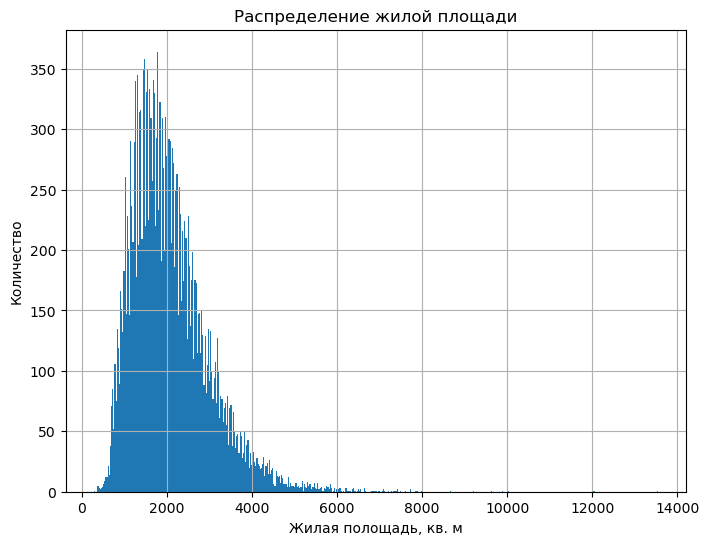

In [5]:
plt.figure(figsize=(8, 6))

plt.hist(df["sqft_living"], bins=500)

plt.title("Распределение жилой площади")
plt.xlabel("Жилая полощадь, кв. м")
plt.ylabel("Количество")
plt.grid();

#### Вывод:
- Повышенным спросом пользуются дома с жилой площадью от ~1000 до ~2500 кв м;
- Дома с жилой площадью до 1000 кв м и свыше 3000 продаются в несущественном количестве. 

### 1.4. 
Изучите распределение года постройки
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [6]:
data = df['yr_built'].value_counts()
data

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

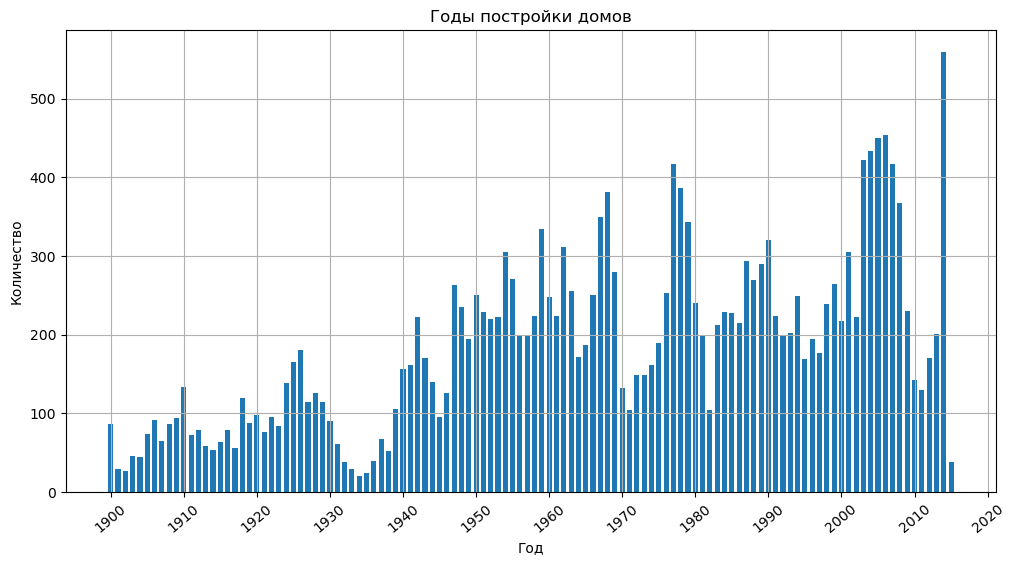

In [7]:
plt.figure(figsize=(12, 6))

plt.bar(data.index, data.values, width=0.7)
plt.title("Годы постройки домов")
plt.xlabel("Год")
plt.ylabel("Количество")
plt.xticks(range(1900, 2025, 10), rotation=40)
plt.grid();

#### Вывод: 
- Количество домой постройки середины 30-х годов прошлого столетия существенно меньше. Причиной этому послужил кризис "Великая депрессия" в США в период 1929-1933 гг.; 
- Следующий период, в который очевидно снижение темпов строительства - начало 70-х годов. Первый нефтяной кризис почти на пять лет замедлил строительство новых домов;
- Заметный кризис на рынке недвижимости случился в США в конце 80-х годов. Причиной стали огромные инвестиционные вливания в новостройки, что сказалось на перенасыщении рынка недвижимости предложениями. Эффект кризиса продлился почти 12 лет;
- Последний, в истории мировой недвижимости кризис произошел в США в 2008 году. Причиной кризиса способствовало ипотечное кредитование, так называемый "ипотечный пузырь". Первые признаки стали проявляться начиная с 2006 года; 
- На период с 2002 по 2006 гг. количество построенных домов достигало пиковых значений. Данный факт обусловлен ростом стоимости нефти. С марта 2002 г. начался продолжительный и практически непрерывный рост цен на нефть, который продлился до 2008 года.

## Задача 2

Постройте график
Сделайте выводы



### 2.1. 
Изучите распределение домов от наличия вида на набережную

In [8]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data

no     21450
yes      163
Name: waterfront, dtype: int64

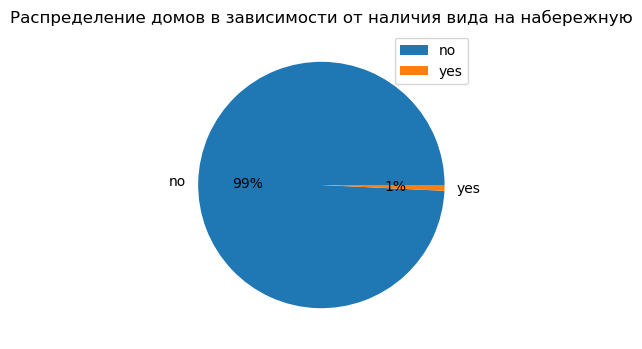

In [9]:
plt.figure(figsize=(6, 4))

plt.pie(data, labels=data.index, autopct='%1.0f%%')

plt.title("Распределение домов в зависимости от наличия вида на набережную")
plt.legend(data.index);

#### Вывод:¶
- 1% домов продается с видом на набережную.

### 2.2. 
Изучите распределение этажей домов

In [10]:
data_1 = df['floors'].value_counts()
data_1

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

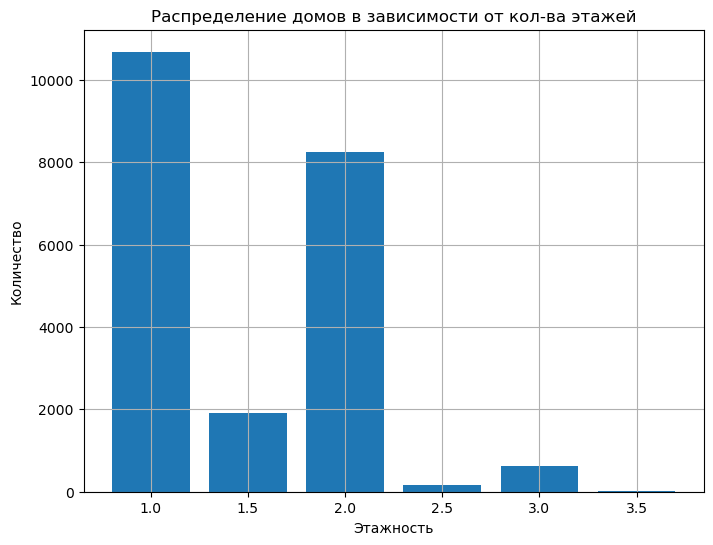

In [11]:
f_value = data_1.values
f_index = data_1.index

plt.figure(figsize=(8, 6))

plt.bar(f_index,f_value, width=0.4)

plt.title("Распределение домов в зависимости от кол-ва этажей")
plt.xlabel("Этажность")
plt.ylabel("Количество")
plt.grid();

In [12]:
data_2 = (df['floors'].value_counts(normalize=True)*100).round(1)
data_2

1.0    49.4
2.0    38.1
1.5     8.8
3.0     2.8
2.5     0.7
3.5     0.0
Name: floors, dtype: float64

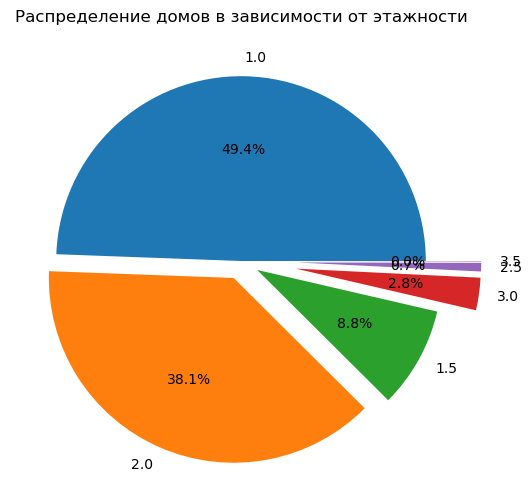

In [13]:
plt.figure(figsize=(8, 6))

explode = [0.0, 0.1, 0.1, 0.3, 0.3, 0.3]

plt.pie(data_1.values, autopct='%1.1f%%', labels=data_1.index, explode=explode)

plt.title("Распределение домов в зависимости от этажности");

#### Вывод:
- Более 80% домов одно- или двухэтажные.
- Продажи одноэтажных домов составляют почти 50%, двухэтажных - 38%.

### 2.3. 
Изучите распределение состояния домов

In [14]:
data_3 = (df['condition'].value_counts(normalize=True)*100).round(1)
data_3

3    64.9
4    26.3
5     7.9
2     0.8
1     0.1
Name: condition, dtype: float64

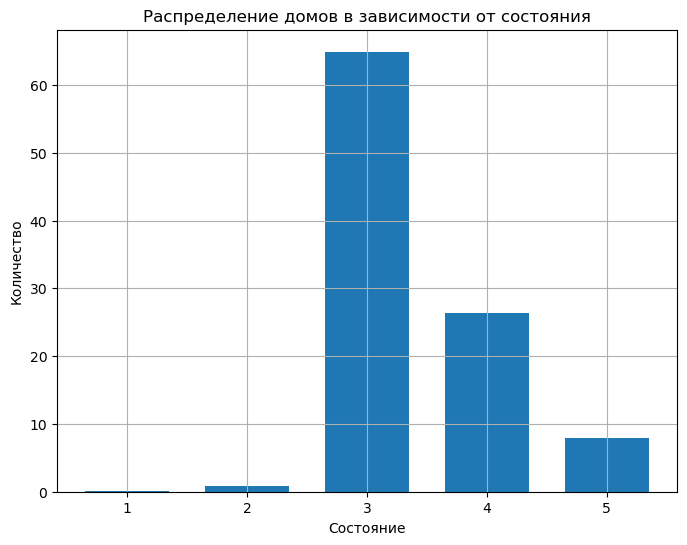

In [15]:
plt.figure(figsize=(8, 6))

plt.bar(data_3.index, data_3.values, width=0.7)

plt.title("Распределение домов в зависимости от состояния")
plt.xlabel("Состояние")
plt.ylabel("Количество")
plt.grid();

#### Вывод:
- Дома с оценкой состояния 3 являются самыми продаваемыми. Доля продаж таких домов порядка 65%.
- Почти 25% продаж относятся к домам с оценкой состояния 4.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [16]:
mat = df.corr().round(1)
mat[np.abs(mat) < 0.3] = 0
mat

/var/folders/l8/n99wcyhs3ls6c85p2x78q6vw0000gn/T/ipykernel_18891/1701735076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = df.corr().round(1)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,...,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0,0.0,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,...,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,...,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,...,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,...,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,...,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,...,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


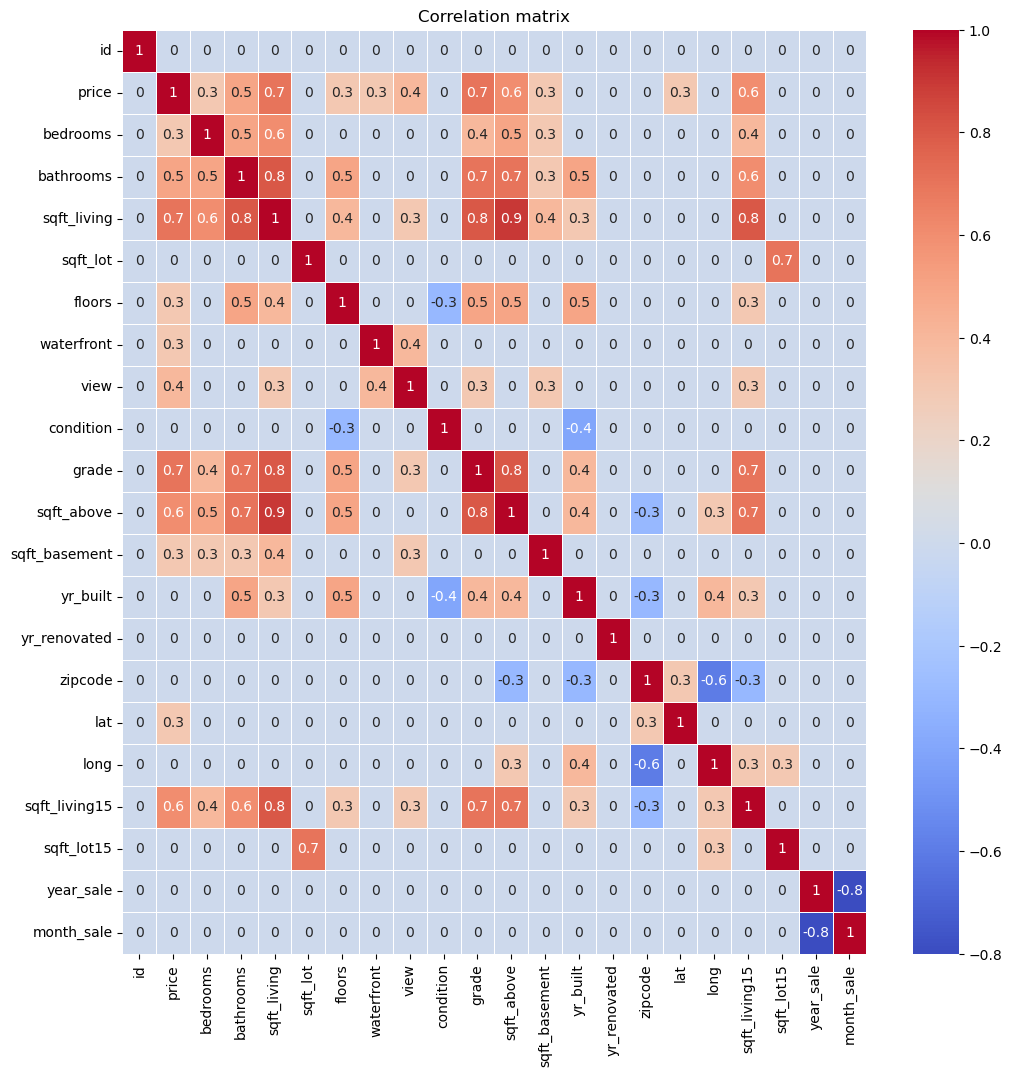

In [17]:
plt.figure(figsize=(12, 12))

sns.heatmap(mat, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

Исходя из анализа корреляционной мартицы в большей степени на формирование цены на недвижимость влияют следующие параметры:
1. Состояние (condition);
2. Уровень (grade);
3. Размер жилой площади (sqlt_living);
4. Этажность домов (floores);
5. Вид из окон (view).

Итак, приступим!

### 3.1  
Изучим взаимосвязь стоимости недвижимости и состояния

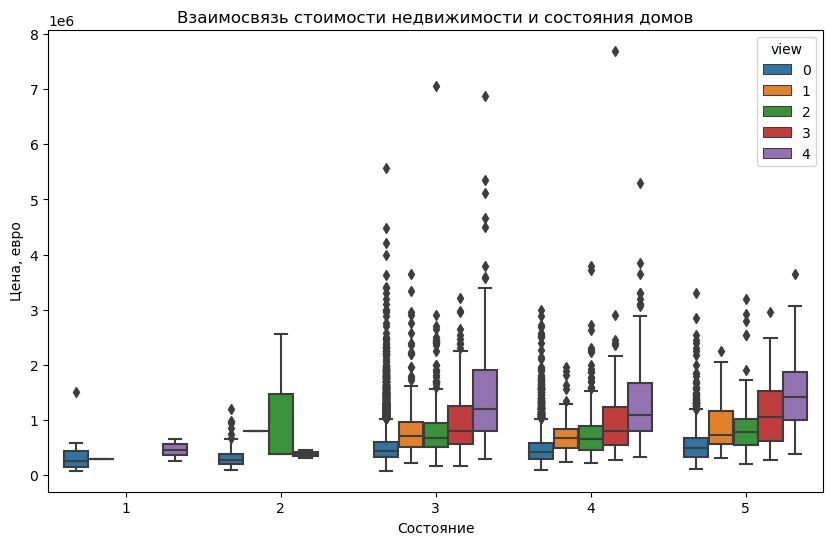

In [18]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df["condition"], y=df["price"], hue=df['view'])

plt.title("Взаимосвязь стоимости недвижимости и состояния домов")
plt.xlabel("Состояние")
plt.ylabel("Цена, евро");

#### Вывод:

- Очевидно, что объекты недвижимости с оценкой состояния выше 3 стоят дороже. Максимальная стоимость таких домов достигает более 7,5 млн евро;
- В категориях домов с оценкой состояния больше 3 цена повышается за счет наличия вида. 
- Большое количество выбросов по цене свидетельствует, что на стоимость влияют другие параметры.
- Дома с оценкой состояния 3-5 - 75% наблюдений находится почти на одном и том же уровне цены.

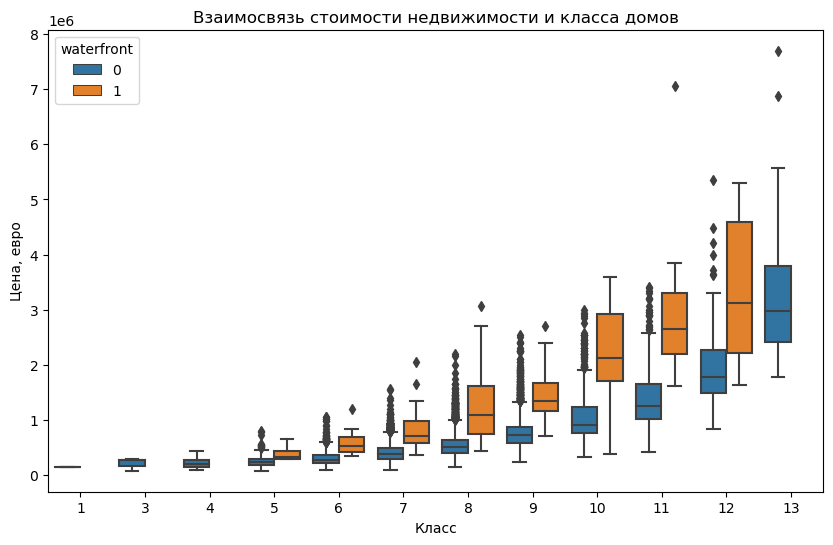

In [19]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df["grade"], y=df["price"], hue=df['waterfront'])

plt.title("Взаимосвязь стоимости недвижимости и класса домов")
plt.xlabel("Класс")
plt.ylabel("Цена, евро");

#### Вывод:

- Стоимость домов одного класса отличается за счет наличия вида на набережную;
- Самыми продаваемые дома относятся к уровням выше 10. Это может означать, что покупателей интересует дизайн, архитектура и технические характеристики недвижимости.

In [20]:
data_4 = df.groupby('sqft_living')['price'].mean().reset_index()
data_4

,sqft_living,price
0,290,142000.0
1,370,276000.0
2,380,245000.0
3,384,265000.0
4,390,236500.0
...,...,...
1033,9640,4668000.0
1034,9890,6885000.0
1035,10040,7062500.0
1036,12050,7700000.0


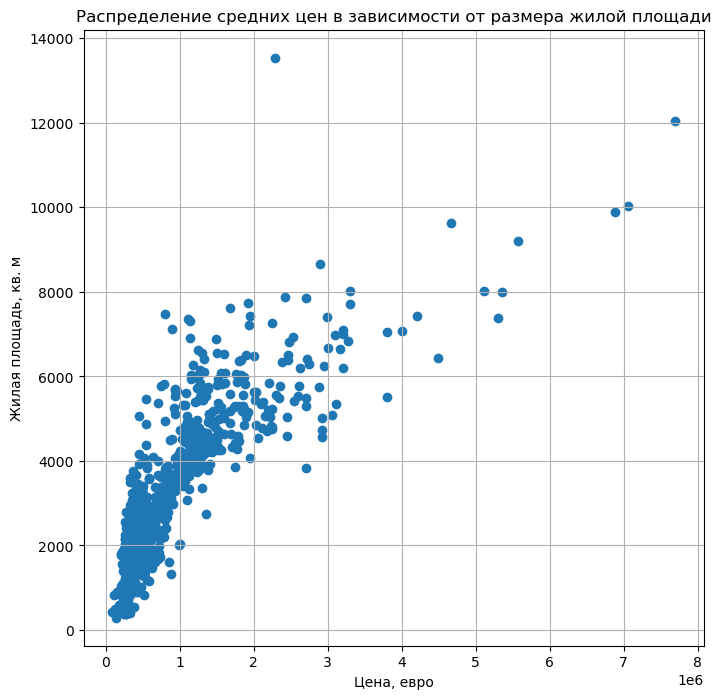

In [21]:
plt.figure(figsize=(8, 8))

plt.scatter(data_4['price'], data_4['sqft_living'])

plt.title('Распределение средних цен в зависимости от размера жилой площади')
plt.xlabel("Цена, евро")
plt.ylabel("Жилая площадь, кв. м")
plt.grid();

#### Вывод:

- Дома с жилой площади до ~ 6000 кв. м продаются со стоимостью до 2 млн евро. В данном диапазоне размер жилой площади оказывает несущественное влияние на стоимость недвижимости. Очевидно, что данная категория обладает повышенным спросом у покупателей;
- Объекты недвижимости с жилой площадью более 6000 кв. м не имеют ограничения по стоимости. Объем таких продаж существенно меньше. Можно предположить, что данный тип недвижимости является элитным.

In [22]:
data_5 = df.groupby('yr_built')['price'].mean().reset_index()
data_5

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


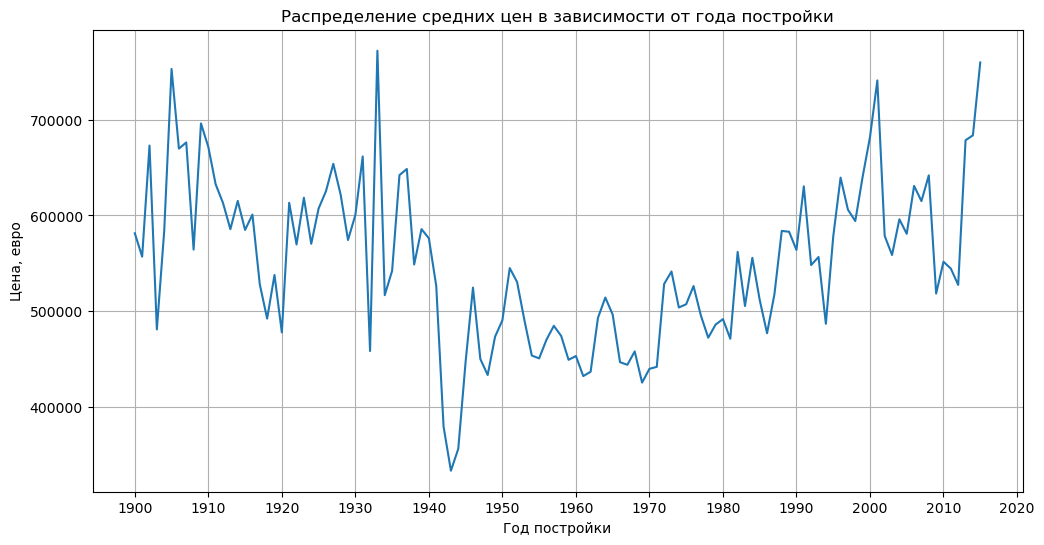

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(data_5['yr_built'], data_5['price'])

plt.title('Распределение средних цен в зависимости от года постройки')
plt.xlabel("Год постройки")
plt.ylabel("Цена, евро")
plt.xticks(range(1900, 2025, 10))
plt.grid();

#### Вывод:
- Стоимость недвижимости, построенных с 1900 по 1940 гг. сопоставима со стоимость домов построенных после 2000 года. Очевидно, "старые" дома имеют определенную историческую ценность и более выгодное расположение (центр города, вид, приближенность к набережным и т.д.);
- Объекты недвижимости, построенные с 1940 по 1970 гг. реализуются по меньшей стоимости из-за отсутствия достаточного спроса на них. Причиной этого служит то, что в данный период в США стартовала программа по строительству социального жилья (по аналогии с нашими хрущевками). Для реализации программы выделили порядка 36 млрд долл. США. В 1970 году такие кварталы объявили зоной бедствия и начали отселение жильцов. Власти решили, что людей легче выселить, чем ремонтировать инфраструктуру;
- Цена на дома постройкой после середины 70-х годов постепенно увеличивается. Этому способствовали развитие технологий, стремительный научный прогресс и развитие бизнеса в тот период.   

In [24]:
data_6 = df.groupby('floors')['price'].mean().reset_index()
data_6

,floors,price
0,1.0,4.421806e+05
1,1.5,5.589806e+05
2,2.0,6.488912e+05
3,2.5,1.060346e+06
4,3.0,5.825260e+05
5,3.5,9.333125e+05


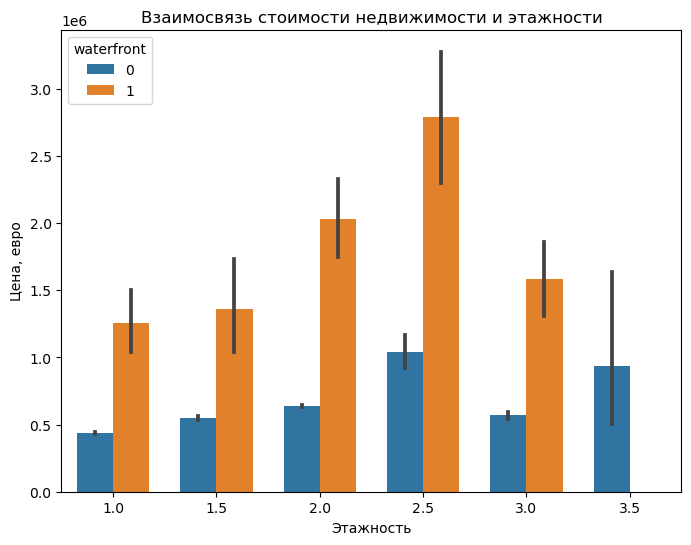

In [25]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df["floors"], y=df["price"], hue=df['waterfront'], width=0.7)

plt.title("Взаимосвязь стоимости недвижимости и этажности")
plt.xlabel("Этажность")
plt.ylabel("Цена, евро");

#### Вывод:
- В зависимости от этажности домов уровень средних цен увеличивается в диапазоне этажей от 1 до 2,5 этажей. С уровня 3-этажных домов цена снижается. Данный факт может свидетельствовать о категории многоквартирных домов, которые не пользуются спросом у покупателей;
- Средняя цена продажи домов в одной категории этажности при наличии вида на набережную выше почти в 2 - 2,5 раза.

### Общий вывод:

1. На стоимость недвижимости в большей степени влияют следующие параметры:
    - размер жилой площади;
    - состояние, качество конструкции и дизайна дома (состояние, класс);
    - историческая ценность (годы постройки);
    - этажность домов.
    